In [3]:
# Plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from matplotlib.colors import ListedColormap

sns.set_style('white')

plt.rc('font', family='sans-serif')
plt.rc('font', serif='Arial')
plt.rc('text', usetex='false')

try:
    plt.style.use('../custom.mplstyle')
except IOError:
    plt.rc('font', size=10)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=12, titlesize=12)
    plt.rc('legend', fontsize=8)

In [2]:
import random
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
df = pd.read_table('../input/follow_up/follow_up.txt',
                   index_col=0,
                   header=[0, 1])

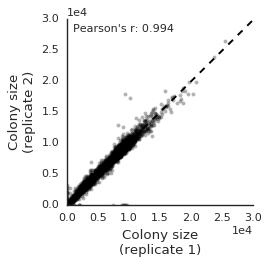

In [6]:
plt.figure(figsize=(3, 3))

r1 = []
r2 = []
for c in set(df.columns.levels[0]):
    tmp = df.xs(c, axis=1, level='condition')
    for v in tmp['1'].values:
        r1.append(v)
    for v in tmp['2'].values:
        r2.append(v)
    plt.plot(tmp['1'],
             tmp['2'],
             'k.',
             alpha=0.3)

l = stats.linregress(tmp['1'],
                     tmp['2'])

fn = l.intercept + l.slope * np.linspace(0, 30000)
plt.plot(np.linspace(0, 30000),
         fn,
         'k--')

plt.text(1000,
         28000,
         'Pearson\'s r: %.3f' % l.rvalue)

plt.xlabel('Colony size\n(replicate 1)')
plt.ylabel('Colony size\n(replicate 2)')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

sns.despine()

plt.savefig('sfig5a.svg', dpi=150);

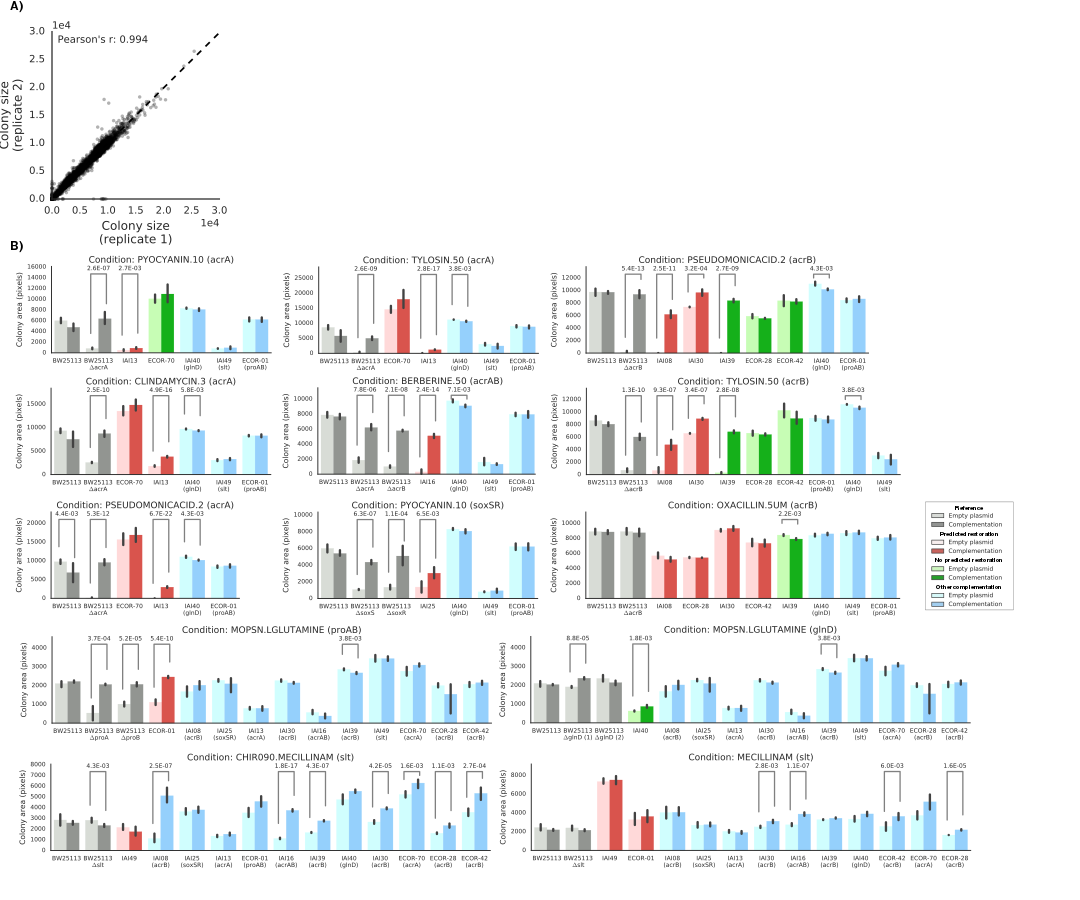

In [12]:
import svgutils.transform as sg
import sys 

#create new SVG figure
fig = sg.SVGFigure("12in", "10in")

# load matpotlib-generated figures
fig1 = sg.fromfile('sfig5a.svg')
fig2 = sg.fromfile('manual_sup5.svg')

# get the plot objects
plot1 = fig1.getroot()
plot1.moveto(25, 10, scale=1)
plot2 = fig2.getroot()
plot2.moveto(10, 250, scale=0.75)

# add text labels
txt1 = sg.TextElement(10,  10, "A)", size=12, weight="bold")
txt2 = sg.TextElement(10,  250, "B)", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2])
fig.append([txt1, txt2])

# save generated SVG files
fig.save("../figures/supplementary/sfig5.svg")

!convert ../figures/supplementary/sfig5.svg sfig5.png

from IPython.display import Image
Image(filename='sfig5.png')